In [1]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Enable account
IBMQ.enable_account("78bb63fbdf0dd0e0fcee3d82c3ddf3067b53b9b00160f05c64ed98146b9574993118e0a2807961e83962ff0046fa4db2db5008741164d46de1b0b042bd7bd773")

C:\Users\timvr\.conda\envs\Quantum_Mastermind\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:109: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Bernstein-Vazirani

1) Generate an $n$ bit secret string<br>

In [7]:
n = 5

secret_string = 1*(np.random.rand(n)<0.5)
print(secret_string)

[1 1 1 1 1]


2) Use it to create an oracle<br>

In [8]:
def Oracle(circuit,secret_string):
    n = len(secret_string)
    if circuit.num_qubits != n+1:
        print("ORACLE ERROR: number of qubits must match secret string length")
    else:
        #Barrier in front
        circuit.barrier()

        #Apply CNOTs to ancilla qubit
        for (i,s) in enumerate(secret_string):
            if s == 1:
                circuit.cx(i,n)
            else:
                circuit.i(i)


        #Barrier at the back
        circuit.barrier()

3) Create BV circuit

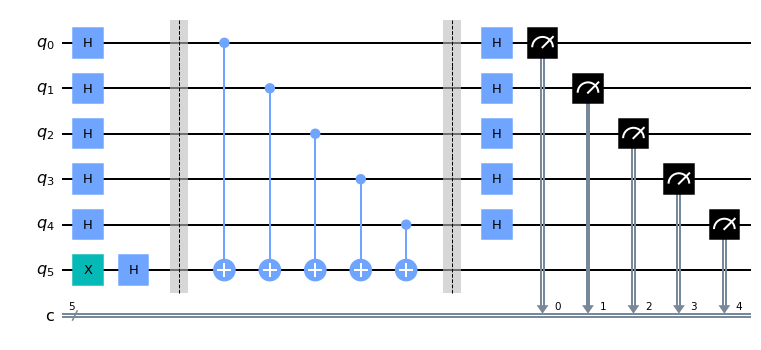

In [9]:
#Create Quantum Circuit with n+1 qubits and n bits
bv_circuit = QuantumCircuit(n+1,n)

#Initialise ancilla to |->
bv_circuit.x(n)
bv_circuit.h(n)

#Apply hadamards to data qubits for superposition
bv_circuit.h(range(n))

#Query oracle
Oracle(bv_circuit,secret_string)

#Apply hadamards to data qubits for interference
bv_circuit.h(range(n))
bv_circuit.measure(range(n),range(n))

bv_circuit.draw("mpl")

4) Simulate the circuit

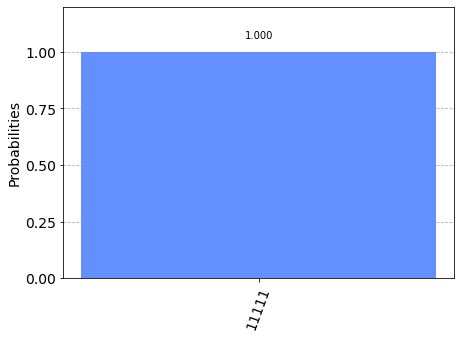

In [10]:
backend = Aer.get_backend("qasm_simulator")
job = execute(bv_circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()
visualization.plot_histogram(counts)

5) Run on IBM Quantum Experience hardware backend

In [6]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_athens')

#Execute
job = execute(bv_circuit, backend=backend, shots=1024)
tools.monitor.job_monitor(job)

TranspilerError: 'Number of qubits (6) in circuit10 is greater than maximum (5) in the coupling_map'

In [ ]:
result = job.result()
counts = result.get_counts()
visualization.plot_histogram(counts)